In [2]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
train <- data.table::fread("./data/train.tsv", stringsAsFactors = FALSE, sep = "\t", data.table = FALSE, encoding = "UTF-8")
test <- data.table::fread("./data/test.tsv", stringsAsFactors = FALSE, sep = "\t", data.table = FALSE, encoding = "UTF-8")

In [3]:
dim(train)

[1]   144 30002

In [4]:
head(train)

id,V0,V1,V2,V3,V4,V5,V6,V7,V8,...,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
0,1.468,1.476,1.484,1.490,1.494,1.498,1.499,1.499,1.497,...,1.561,1.562,1.561,1.559,1.558,1.558,1.556,1.555,1.553,173
1,1.493,1.492,1.490,1.490,1.490,1.492,1.493,1.497,1.499,...,1.410,1.408,1.408,1.408,1.408,1.410,1.411,1.412,1.416,155
3,1.581,1.581,1.583,1.584,1.586,1.589,1.591,1.591,1.591,...,1.532,1.534,1.533,1.530,1.528,1.527,1.527,1.526,1.526,134
4,1.531,1.530,1.530,1.530,1.530,1.530,1.530,1.531,1.531,...,1.523,1.524,1.523,1.522,1.520,1.520,1.522,1.524,1.523,130
6,1.522,1.521,1.520,1.519,1.518,1.517,1.515,1.514,1.515,...,1.561,1.561,1.560,1.558,1.559,1.559,1.558,1.559,1.561,139
7,1.543,1.547,1.551,1.555,1.562,1.568,1.572,1.576,1.580,...,1.480,1.474,1.467,1.462,1.458,1.454,1.450,1.446,1.442,135


In [5]:
tail(train)

,id,V0,V1,V2,V3,V4,V5,V6,V7,V8,...,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
139,193,1.495,1.497,0.000,1.500,1.505,1.508,1.510,1.510,1.508,...,1.662,1.663,1.666,1.670,1.673,1.670,1.662,1.650,1.633,186
140,194,1.589,1.557,1.525,1.495,1.467,1.438,1.410,1.382,1.350,...,1.432,1.441,1.456,1.485,1.526,1.575,1.629,1.690,1.745,228
141,195,1.526,1.582,1.625,1.656,1.678,1.697,1.711,1.714,1.708,...,3.060,3.060,3.060,3.060,3.060,3.060,3.060,3.060,3.060,136
142,196,0.924,0.899,0.871,0.841,0.809,0.773,0.733,0.688,0.644,...,1.550,1.551,1.553,1.556,1.556,1.556,1.556,1.558,1.560,125
143,197,1.704,1.692,1.677,1.660,1.645,1.633,1.620,1.605,1.593,...,1.369,1.371,1.373,1.375,1.376,1.379,1.382,1.382,1.383,136
144,198,1.535,1.533,1.532,1.532,1.532,1.532,1.533,1.533,1.533,...,1.558,1.560,1.561,1.562,1.562,1.563,1.564,1.566,1.566,179


In [4]:
sort(train$Y)

[1]  93 110 115 119 120 124 125 125 125 125 126 127 127 129 130 130 130 131
 [19] 131 131 132 132 132 132 132 132 132 132 133 133 134 134 134 134 135 135
 [37] 135 135 136 136 136 138 138 138 139 139 139 139 139 140 140 141 141 142
 [55] 143 144 144 147 147 149 150 150 153 154 155 155 156 159 160 160 160 161
 [73] 162 162 162 164 165 166 166 167 167 168 168 168 170 170 170 171 173 173
 [91] 173 173 175 176 176 178 178 179 179 180 181 181 181 182 183 185 185 186
[109] 186 186 190 191 191 192 192 194 195 196 197 197 198 200 200 201 201 201
[127] 202 203 203 204 204 204 206 208 208 210 212 214 221 223 228 229 240 295

In [6]:
length(unique(train$Y))

[1] 77

In [11]:
summary(train[,"Y"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   93.0   135.0   161.5   163.2   186.0   295.0 

In [15]:
# 平均, 最大値, 最小値, 偏差の列を追加
# 予測結果にあまり影響がないので、利用しない
# train$mean <- apply(train[,-c(1,30002)], 1, mean)
# train$max <- apply(train[,-c(1,30002)], 1, max)
# train$min <- apply(train[,-c(1,30002)], 1, min)
# train$sd <- apply(train[,-c(1,30002)], 1, sd)

# maxPooling を実現する

In [5]:
# maxPooling を実現する関数を読み込む
source("script/R/fun/maxPooling.R")

In [5]:
head(maxPooling(train[1,-c(1, 30002)]))

[1] 1.499 1.488 1.468 1.438 1.406 1.404

In [ ]:
train.maxPooling <- apply(train[, -c(1, 30002)], 1, maxPooling) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [28]:
dim(train.maxPooling)

[1]  144 3002

In [30]:
head(train.maxPooling)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X2992,X2993,X2994,X2995,X2996,X2997,X2998,X2999,X3000,Y
0,1.499,1.488,1.468,1.438,1.406,1.404,1.426,1.428,1.498,⋯,1.556,1.548,1.549,1.550,1.558,1.558,1.557,1.561,1.562,173
1,1.500,1.514,1.513,1.514,1.512,1.507,1.456,1.367,1.343,⋯,1.536,1.547,1.546,1.537,1.520,1.477,1.475,1.446,1.416,155
3,1.591,1.590,1.579,1.549,1.587,1.624,1.622,1.599,1.599,⋯,1.649,1.576,1.509,1.516,1.518,1.492,1.520,1.528,1.534,134
4,1.531,1.532,1.532,1.532,1.535,1.533,1.530,1.527,1.525,⋯,1.545,1.544,1.544,1.535,1.530,1.530,1.528,1.524,1.524,130
6,1.522,1.513,1.504,1.497,1.546,1.589,1.585,1.576,1.569,⋯,1.481,1.471,1.474,1.531,1.548,1.572,1.581,1.573,1.562,139
7,1.583,1.604,1.621,1.633,1.629,1.605,1.589,1.571,1.558,⋯,1.456,1.466,1.471,1.480,1.504,1.517,1.521,1.515,1.486,135


In [ ]:
## maxPooling を 10 単位で実施

In [40]:
test.maxPooling <- apply(test[, -c(1)], 1, maxPooling) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [41]:
dim(test.maxPooling)

[1]   57 3001

In [42]:
head(test.maxPooling)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X2991,X2992,X2993,X2994,X2995,X2996,X2997,X2998,X2999,X3000
2,1.559,1.558,1.552,1.555,1.551,1.548,1.545,1.563,1.567,⋯,1.678,1.631,1.541,1.441,1.363,1.283,1.420,1.523,1.520,1.509
5,1.573,1.573,1.568,1.558,1.558,1.548,1.575,1.587,1.587,⋯,1.561,1.559,1.555,1.568,1.577,1.578,1.574,1.568,1.565,1.555
12,1.475,1.520,1.528,1.533,1.606,1.674,1.668,1.600,1.725,⋯,1.550,1.540,1.509,1.461,1.490,1.488,1.462,1.464,1.458,1.440
18,1.507,1.516,1.525,1.524,1.525,1.518,1.507,1.499,1.505,⋯,1.505,1.502,1.494,1.482,1.496,1.499,1.495,1.499,1.499,1.502
19,1.596,1.462,1.485,1.469,1.387,1.446,1.693,1.711,1.604,⋯,1.530,1.533,1.543,1.546,1.558,1.550,1.535,1.510,1.512,1.534
24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,1.545,1.544,1.538,1.531,1.526,1.520,1.522,1.524,1.527,1.522


In [7]:
head(maxPooling(train[1,-c(1, 30002)], N = 3))

[1] 1.484 1.498 1.499 1.490 1.486 1.477

## maxPooling を 5 単位で実施

In [8]:
train.maxPooling5 <- apply(train[, -c(1, 30002)], 1, maxPooling, N = 5) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [10]:
head(train.maxPooling5)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999,X6000,Y
0,1.494,1.499,1.488,1.477,1.468,1.453,1.438,1.415,1.404,⋯,1.558,1.558,1.558,1.556,1.557,1.557,1.561,1.562,1.558,173
1,1.493,1.500,1.510,1.514,1.513,1.513,1.514,1.511,1.512,⋯,1.495,1.477,1.475,1.475,1.469,1.446,1.423,1.412,1.416,155
3,1.586,1.591,1.590,1.581,1.579,1.566,1.549,1.525,1.542,⋯,1.509,1.492,1.489,1.508,1.520,1.521,1.528,1.534,1.528,134
4,1.531,1.531,1.530,1.532,1.532,1.532,1.532,1.532,1.535,⋯,1.530,1.528,1.530,1.528,1.527,1.524,1.523,1.524,1.524,130
6,1.522,1.517,1.513,1.508,1.504,1.503,1.497,1.497,1.498,⋯,1.548,1.558,1.572,1.581,1.576,1.573,1.572,1.562,1.561,139
7,1.562,1.583,1.597,1.604,1.614,1.621,1.631,1.633,1.629,⋯,1.504,1.513,1.517,1.521,1.520,1.515,1.509,1.486,1.458,135


In [11]:
test.maxPooling5 <- apply(test[, -c(1)], 1, maxPooling, N = 5) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [12]:
head(test.maxPooling5)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X5991,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999,X6000
2,1.555,1.559,1.558,1.556,1.552,1.552,1.554,1.555,1.550,⋯,1.250,1.283,1.334,1.420,1.505,1.523,1.520,1.479,1.481,1.509
5,1.571,1.573,1.573,1.571,1.568,1.563,1.558,1.556,1.558,⋯,1.578,1.577,1.574,1.572,1.568,1.567,1.565,1.559,1.555,1.553
12,1.447,1.475,1.501,1.520,1.525,1.528,1.524,1.533,1.567,⋯,1.488,1.479,1.462,1.456,1.459,1.464,1.458,1.448,1.440,1.433
18,1.507,1.497,1.492,1.516,1.522,1.525,1.522,1.524,1.525,⋯,1.499,1.497,1.495,1.495,1.499,1.499,1.499,1.497,1.500,1.502
19,1.596,1.475,1.446,1.462,1.470,1.485,1.469,1.420,1.385,⋯,1.550,1.544,1.535,1.516,1.505,1.510,1.512,1.491,1.512,1.534
24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,1.520,1.520,1.522,1.522,1.522,1.524,1.527,1.526,1.522,1.516


In [13]:
# 学習用データの保存
write.table(
            train.maxPooling5 #出力データ
            ,"data/train.maxPooling5.20170701.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [14]:
# 評価用データの保存
write.table(
            test.maxPooling5 #出力データ
            ,"data/test.maxPooling5.20170701.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

## maxPooling を 6 単位で実施

In [27]:
train.maxPooling6 <- apply(train[, -c(1, 30002)], 1, maxPooling, N = 6) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [28]:
head(train.maxPooling6)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X4992,X4993,X4994,X4995,X4996,X4997,X4998,X4999,X5000,Y
0,1.498,1.499,1.486,1.472,1.456,1.438,1.410,1.406,1.403,⋯,1.546,1.555,1.558,1.558,1.557,1.557,1.558,1.562,1.559,173
1,1.493,1.503,1.514,1.514,1.513,1.514,1.512,1.510,1.508,⋯,1.529,1.510,1.480,1.475,1.475,1.467,1.431,1.418,1.416,155
3,1.589,1.591,1.589,1.579,1.569,1.549,1.525,1.568,1.616,⋯,1.518,1.515,1.498,1.489,1.511,1.521,1.525,1.534,1.530,134
4,1.531,1.531,1.532,1.532,1.532,1.532,1.535,1.535,1.533,⋯,1.530,1.530,1.527,1.530,1.528,1.527,1.523,1.524,1.524,130
6,1.522,1.515,1.510,1.506,1.504,1.497,1.497,1.527,1.577,⋯,1.538,1.543,1.556,1.572,1.581,1.576,1.573,1.563,1.561,139
7,1.568,1.589,1.601,1.612,1.621,1.632,1.633,1.625,1.611,⋯,1.486,1.499,1.512,1.517,1.521,1.519,1.513,1.498,1.462,135


In [29]:
test.maxPooling6 <- apply(test[, -c(1)], 1, maxPooling, N = 6) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [30]:
head(test.maxPooling6)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X4991,X4992,X4993,X4994,X4995,X4996,X4997,X4998,X4999,X5000
2,1.558,1.559,1.556,1.553,1.552,1.554,1.555,1.551,1.549,⋯,1.363,1.301,1.269,1.324,1.420,1.512,1.523,1.508,1.480,1.509
5,1.571,1.573,1.571,1.571,1.563,1.558,1.557,1.558,1.551,⋯,1.574,1.577,1.578,1.574,1.572,1.568,1.567,1.563,1.555,1.553
12,1.451,1.484,1.514,1.521,1.528,1.524,1.543,1.589,1.637,⋯,1.488,1.490,1.487,1.467,1.457,1.461,1.464,1.453,1.442,1.433
18,1.507,1.496,1.505,1.522,1.525,1.522,1.525,1.525,1.520,⋯,1.481,1.498,1.499,1.495,1.495,1.499,1.499,1.497,1.499,1.502
19,1.596,1.461,1.443,1.470,1.485,1.469,1.417,1.387,1.395,⋯,1.550,1.558,1.544,1.538,1.518,1.505,1.512,1.508,1.503,1.534
24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,1.526,1.521,1.520,1.521,1.522,1.522,1.526,1.527,1.524,1.519


In [31]:
# 学習用データの保存
write.table(
            train.maxPooling6 #出力データ
            ,"data/train.maxPooling6.20170702.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [32]:
# 評価用データの保存
write.table(
            test.maxPooling6 #出力データ
            ,"data/test.maxPooling6.20170702.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

## maxPooling を 8 単位で実施

In [21]:
train.maxPooling8 <- apply(train[, -c(1, 30002)], 1, maxPooling, N = 8) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [22]:
head(train.maxPooling8)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X3742,X3743,X3744,X3745,X3746,X3747,X3748,X3749,X3750,Y
0,1.499,1.497,1.475,1.456,1.429,1.406,1.403,1.404,1.428,⋯,1.548,1.550,1.548,1.558,1.558,1.557,1.557,1.561,1.562,173
1,1.497,1.512,1.514,1.514,1.513,1.512,1.508,1.490,1.414,⋯,1.547,1.537,1.532,1.510,1.477,1.475,1.467,1.425,1.416,155
3,1.591,1.591,1.579,1.569,1.540,1.568,1.622,1.624,1.610,⋯,1.521,1.492,1.518,1.515,1.492,1.511,1.521,1.532,1.534,134
4,1.531,1.531,1.532,1.532,1.532,1.535,1.533,1.531,1.530,⋯,1.544,1.543,1.535,1.530,1.530,1.529,1.527,1.523,1.524,130
6,1.522,1.515,1.506,1.504,1.497,1.527,1.586,1.589,1.579,⋯,1.462,1.497,1.538,1.548,1.566,1.581,1.576,1.573,1.561,139
7,1.576,1.599,1.612,1.625,1.633,1.629,1.611,1.594,1.580,⋯,1.471,1.472,1.486,1.504,1.515,1.521,1.519,1.511,1.474,135


In [23]:
test.maxPooling8 <- apply(test[, -c(1)], 1, maxPooling, N = 8) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [24]:
head(test.maxPooling8)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X3741,X3742,X3743,X3744,X3745,X3746,X3747,X3748,X3749,X3750
2,1.559,1.559,1.555,1.553,1.555,1.551,1.549,1.548,1.546,⋯,1.541,1.451,1.403,1.319,1.283,1.377,1.512,1.523,1.490,1.509
5,1.573,1.573,1.571,1.563,1.558,1.558,1.551,1.555,1.579,⋯,1.555,1.561,1.573,1.577,1.578,1.574,1.571,1.567,1.562,1.553
12,1.464,1.505,1.521,1.528,1.533,1.589,1.652,1.674,1.656,⋯,1.509,1.468,1.481,1.490,1.487,1.462,1.461,1.464,1.450,1.435
18,1.507,1.494,1.522,1.525,1.524,1.525,1.520,1.512,1.504,⋯,1.494,1.484,1.476,1.498,1.499,1.495,1.499,1.499,1.498,1.502
19,1.596,1.449,1.470,1.485,1.441,1.387,1.400,1.519,1.711,⋯,1.535,1.546,1.549,1.558,1.544,1.535,1.507,1.512,1.496,1.534
24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,1.538,1.535,1.529,1.521,1.520,1.522,1.522,1.527,1.526,1.521


In [25]:
# 学習用データの保存
write.table(
            train.maxPooling8 #出力データ
            ,"data/train.maxPooling8.20170702.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [26]:
# 評価用データの保存
write.table(
            test.maxPooling8 #出力データ
            ,"data/test.maxPooling8.20170702.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

## maxPooling を 15 単位で実施

In [15]:
train.maxPooling15 <- apply(train[, -c(1, 30002)], 1, maxPooling, N = 15) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [16]:
head(train.maxPooling15)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000,Y
0,1.499,1.477,1.438,1.406,1.428,1.498,1.577,1.596,1.558,⋯,1.571,1.569,1.561,1.556,1.549,1.553,1.558,1.557,1.562,173
1,1.510,1.514,1.514,1.510,1.456,1.343,1.382,1.451,1.494,⋯,1.565,1.553,1.537,1.543,1.547,1.537,1.495,1.475,1.423,155
3,1.591,1.581,1.549,1.624,1.622,1.599,1.569,1.591,1.609,⋯,1.493,1.635,1.661,1.649,1.543,1.518,1.509,1.521,1.534,134
4,1.531,1.532,1.535,1.533,1.530,1.525,1.523,1.510,1.518,⋯,1.562,1.546,1.541,1.545,1.544,1.535,1.530,1.528,1.524,130
6,1.522,1.508,1.498,1.589,1.585,1.574,1.555,1.535,1.520,⋯,1.521,1.500,1.489,1.481,1.474,1.539,1.572,1.581,1.572,139
7,1.597,1.621,1.633,1.618,1.589,1.565,1.551,1.545,1.543,⋯,1.498,1.441,1.430,1.461,1.471,1.491,1.517,1.521,1.509,135


In [17]:
test.maxPooling15 <- apply(test[, -c(1)], 1, maxPooling, N = 15) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [18]:
head(test.maxPooling15)

id,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
2,1.559,1.556,1.555,1.551,1.550,1.567,1.563,1.559,1.551,⋯,1.734,1.736,1.678,1.678,1.631,1.475,1.363,1.420,1.523,1.509
5,1.573,1.571,1.558,1.551,1.584,1.587,1.578,1.576,1.555,⋯,1.579,1.576,1.575,1.566,1.559,1.568,1.578,1.577,1.568,1.559
12,1.501,1.528,1.567,1.674,1.668,1.725,1.747,1.709,1.637,⋯,1.676,1.681,1.639,1.576,1.540,1.484,1.490,1.479,1.464,1.448
18,1.507,1.525,1.525,1.522,1.507,1.505,1.533,1.534,1.532,⋯,1.521,1.508,1.514,1.505,1.502,1.487,1.499,1.497,1.499,1.502
19,1.596,1.485,1.469,1.446,1.711,1.658,1.567,1.540,1.355,⋯,1.502,1.504,1.541,1.540,1.535,1.546,1.558,1.544,1.512,1.534
24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,1.592,1.574,1.560,1.545,1.544,1.537,1.526,1.522,1.527,1.526


In [19]:
# 学習用データの保存
write.table(
            train.maxPooling15 #出力データ
            ,"data/train.maxPooling15.20170701.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [20]:
# 評価用データの保存
write.table(
            test.maxPooling15 #出力データ
            ,"data/test.maxPooling15.20170701.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

# minPooling % maxPooling を実現する

In [1]:
# maxPooling を実現する関数を読み込む
source("script/R/fun/minPooling.R")

## maxPooling5 & minPooling5

In [6]:
train.max5Pooling <- apply(train[, -c(1, 30002)], 1, maxPooling, N = 5) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [32]:
train.max5min2Pooling <- apply(train.max5Pooling[, -c(1, 6002)], 1, minPooling, N = 2
                               , LENGTH = length(train.max5Pooling[, -c(1, 6002)])) %>%
  t() %>%
  data.frame(id = train[,"id"], . , Y = train[,"Y"])

In [34]:
test.max5Pooling <- apply(test[, -c(1)], 1, maxPooling, N = 5) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [38]:
test.max5min2Pooling <- apply(test.max5Pooling[, -c(1)], 1, minPooling, N = 2
                               , LENGTH = length(test.max5Pooling[, -c(1)])) %>%
  t() %>%
  data.frame(id = test[,"id"], . )

In [41]:
# 学習用データの保存
write.table(
            train.max5min2Pooling #出力データ
            ,"data/train.max5min2Pooling.20170711.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [42]:
# 評価用データの保存
write.table(
            test.max5min2Pooling #出力データ
            ,"data/test.max5min2Pooling.20170711.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

# データを眺めてみる

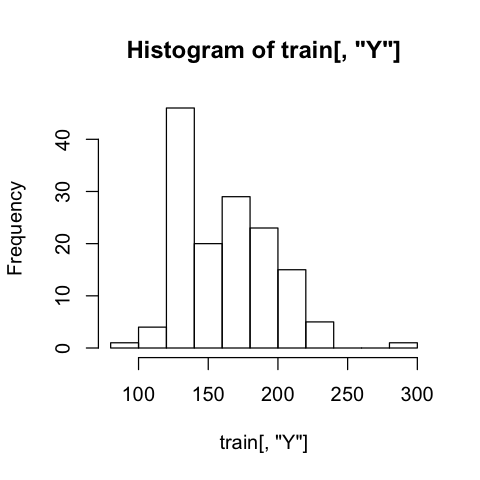

In [26]:
options(repr.plot.width=4, repr.plot.height=4)

hist(train[,"Y"])

In [5]:
train[1,-c(1,30002)]

V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V29990,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999
1.468,1.476,1.484,1.49,1.494,1.498,1.499,1.499,1.497,1.49,⋯,1.561,1.561,1.562,1.561,1.559,1.558,1.558,1.556,1.555,1.553


,id,V0,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
1,0,1.468,1.476,1.484,1.490,1.494,1.498,1.499,1.499,1.497,⋯,1.561,1.562,1.561,1.559,1.558,1.558,1.556,1.555,1.553,173
9,10,1.809,1.807,1.804,1.802,1.798,1.796,1.793,1.790,1.785,⋯,1.551,1.551,1.551,1.551,1.549,1.548,1.548,1.547,1.546,173
27,32,1.558,1.560,1.563,1.566,1.567,1.569,1.568,1.566,1.568,⋯,1.518,1.520,1.524,1.527,1.526,1.526,1.527,1.528,1.530,173
52,69,1.538,1.537,1.535,1.535,1.535,1.535,1.535,1.535,1.534,⋯,1.540,1.540,1.540,1.539,1.538,1.537,1.537,1.537,1.535,173


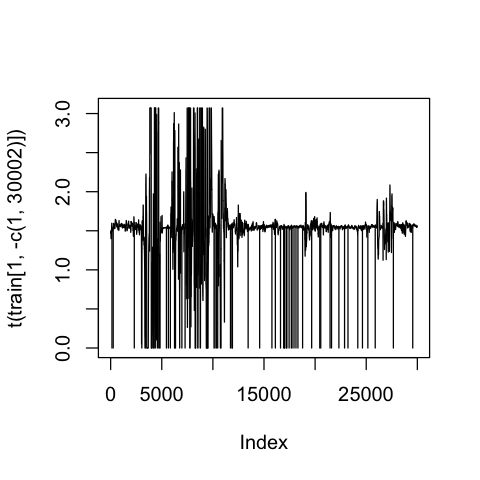

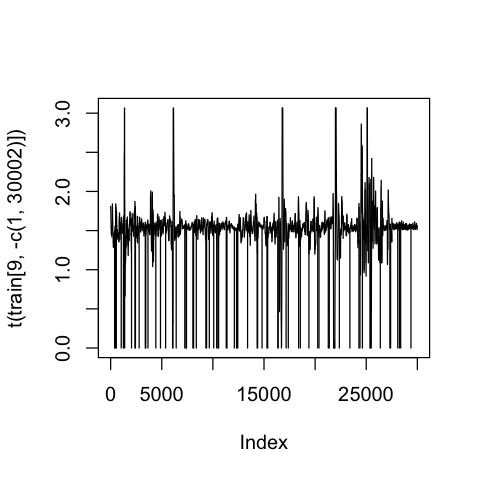

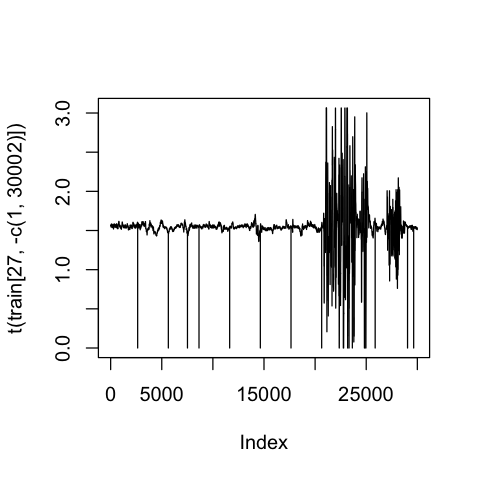

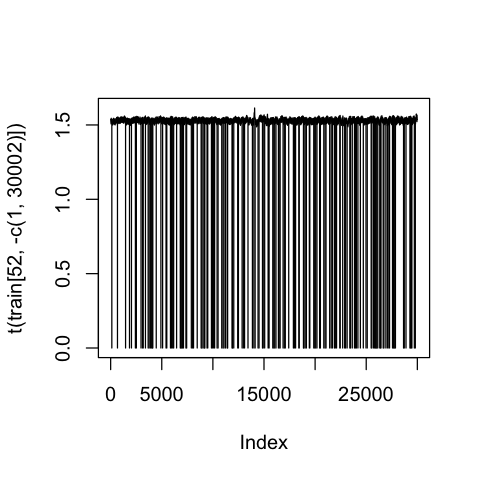

In [43]:
options(repr.plot.width=4, repr.plot.height=4)

train[which(train[,"Y"] == 173 ),]

# Y = 173 のグラフ
plot(t(train[1,-c(1,30002)]), type = "l")
plot(t(train[9,-c(1,30002)]), type = "l")
plot(t(train[27,-c(1,30002)]), type = "l")
plot(t(train[52,-c(1,30002)]), type = "l")

,id,V0,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
33,38,2.389,2.329,2.268,2.215,2.171,2.138,2.113,2.096,2.084,⋯,1.567,1.567,1.569,1.569,1.568,1.569,1.572,1.574,1.578,295


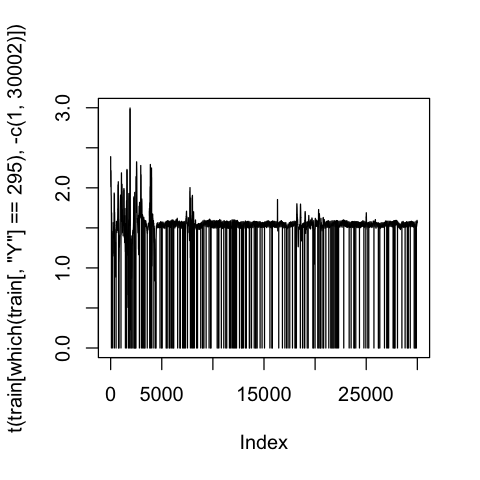

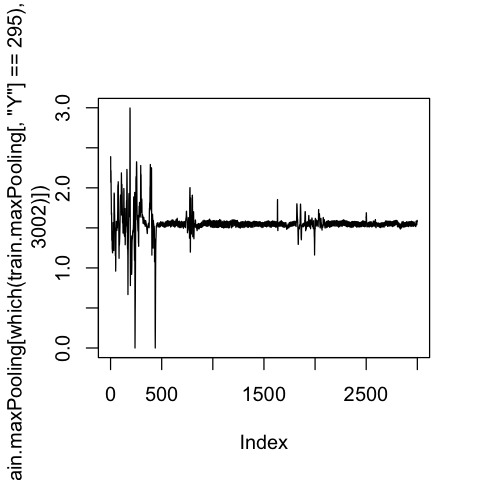

In [34]:
# Y = 295 ( 最大値 ) のグラフ
options(repr.plot.width=4, repr.plot.height=4)

train[which(train[,"Y"] == 295 ),]
plot(t(train[which(train[,"Y"] == 295 ),-c(1,30002)]), type = "l")
plot(t(train.maxPooling[which(train.maxPooling[,"Y"] == 295 ),-c(1,3002)]), type = "l")

,id,V0,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
19,23,1.535,1.536,1.539,1.541,1.543,1.545,1.544,1.544,1.543,⋯,1.534,1.538,1.541,1.54,1.539,1.538,1.539,1.542,1.544,93


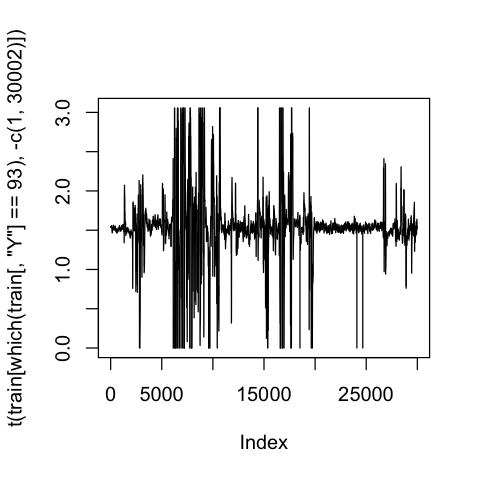

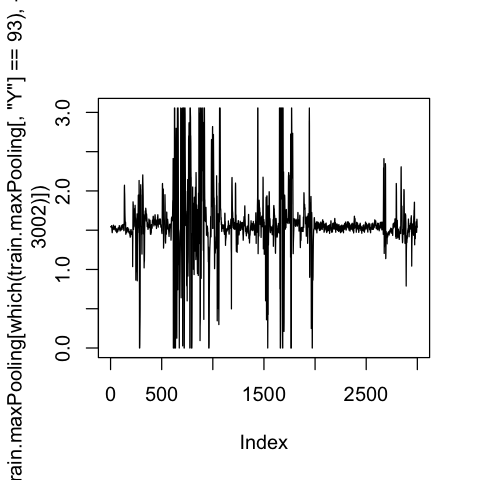

In [35]:
# Y = 93 ( 最小値 ) のグラフ

train[which(train[,"Y"] == 93 ),]
plot(t(train[which(train[,"Y"] == 93 ),-c(1,30002)]), type = "l")
plot(t(train.maxPooling[which(train.maxPooling[,"Y"] == 93 ),-c(1,3002)]), type = "l")

,id,V0,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
80,106,1.562,1.564,1.564,1.563,1.562,1.562,1.561,1.561,1.561,⋯,1.453,1.449,1.454,1.463,1.471,1.475,1.476,1.477,1.48,110


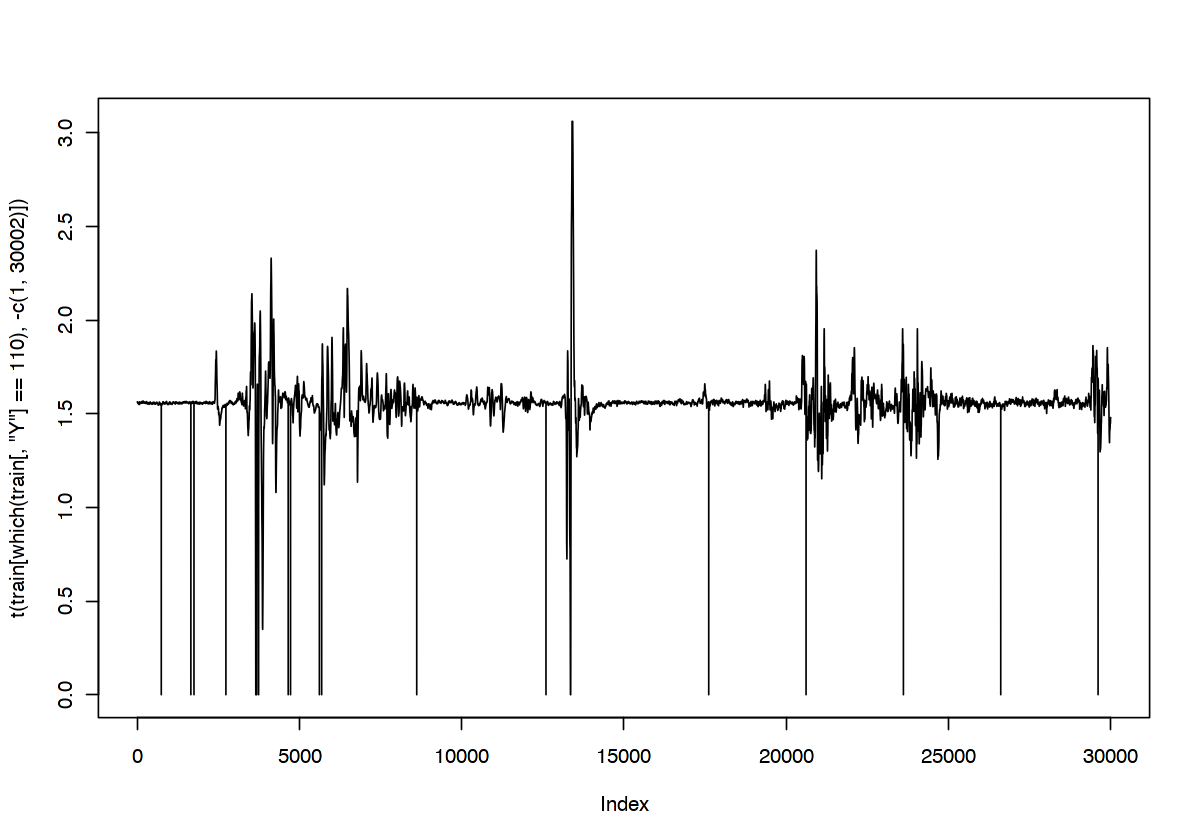

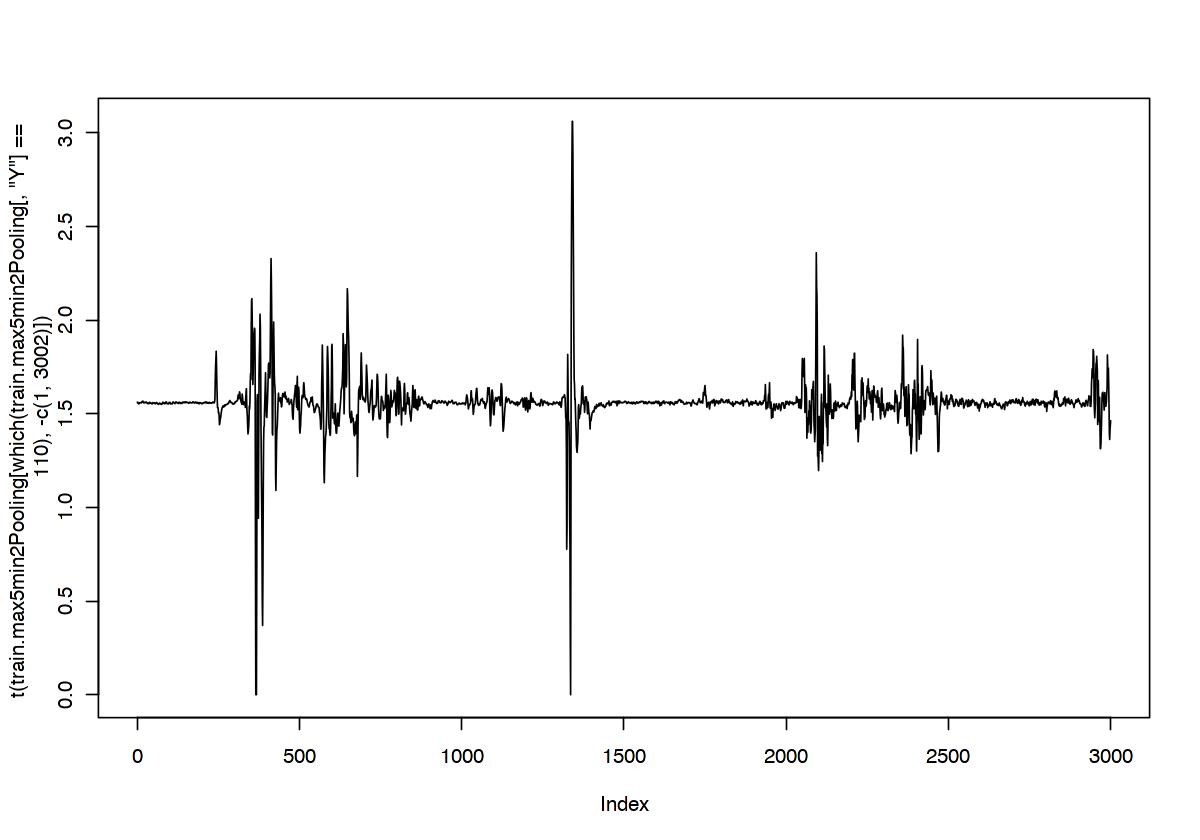

In [28]:
# Y = 110 のグラフ
options(repr.plot.width=10, repr.plot.height=7)

train[which(train[,"Y"] == 110 ),]
plot(t(train[which(train[,"Y"] == 110 ),-c(1,30002)]), type = "l")
#plot(t(train.maxPooling[which(train.maxPooling[,"Y"] == 110 ),-c(1,3002)]), type = "l")
plot(t(train.max5min2Pooling[which(train.max5min2Pooling[,"Y"] == 110 ),-c(1,3002)]), type = "l")

In [43]:
# 学習用データの保存
write.table(
            train.maxPooling #出力データ
            ,"data/train.maxPooling.20170627.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)

In [44]:
# 評価用データの保存
write.table(
            test.maxPooling #出力データ
            ,"data/test.maxPooling.20170627.tsv" #出力先
            ,quote = FALSE #文字列を「"」で囲む有無
            ,col.names = TRUE #変数名(列名)の有無
            ,row.names = FALSE #行番号の有無
            ,sep = "\t" #区切り文字の指定
)